# Import dos dados

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar a tabela como um DataFrame do Pandas
df = pd.read_csv("ClientesPJ.csv", delimiter=";", encoding="latin1")
df

,Cod Cliente,Velocidade de entrega,Nível de preço,Flexibilidade de preço,Imagem do fabricante,Serviço geral,Imagem da força de vendas,Qualidade do produto,Tamanho da empresa,Nível de uso,Nível de satisfação,Especificacao de compra,Estrutura de aquisicao,Tipo de industria,Tipo de situacao de compra
0,1803277,"4,1","0,6","6,9","4,7","2,4","2,3","5,2",Pequena,32,"4,2",uso de especificacoes de compra,Nao-centralizada,Tradicional,Nova tarefa
1,1802002,"1,8",3,"6,3","6,6","2,5",4,"8,4",Grande,43,"4,3",analise do valor total,Centralizada,Semi-Digital,Nova tarefa
2,1799215,"3,4","5,2","5,7",6,"4,3","2,7","8,2",Grande,48,"5,2",analise do valor total,Centralizada,Tradicional,Nova compra modificada
3,1791840,"2,7",1,"7,1","5,9","1,8","2,3","7,8",Grande,32,"3,9",analise do valor total,Centralizada,Tradicional,Nova tarefa
4,1795801,6,"0,9","9,6","7,8","3,4","4,6","4,5",Pequena,58,"6,8",uso de especificacoes de compra,Nao-centralizada,Tradicional,Nova compra simples
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1789023,"0,6","1,6","6,4",5,"0,7","2,1","8,4",Grande,25,"3,4",analise do valor total,Centralizada,Tradicional,Nova tarefa
96,1793623,"6,1","0,5","9,2","4,8","3,3","2,8","7,1",Pequena,60,"5,2",uso de especificacoes de compra,Nao-centralizada,Tradicional,Nova compra simples
97,1792957,2,"2,8","5,2",5,"2,4","2,7","8,4",Grande,38,"3,7",analise do valor total,Centralizada,Semi-Digital,Nova tarefa
98,1795540,"3,1","2,2","6,7","6,8","2,6","2,9","8,4",Grande,42,"4,3",analise do valor total,Centralizada,Semi-Digital,Nova tarefa


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Cod Cliente                 100 non-null    int64 
 1   Velocidade de entrega       100 non-null    object
 2   Nível de preço              100 non-null    object
 3   Flexibilidade de preço      100 non-null    object
 4   Imagem do fabricante        100 non-null    object
 5   Serviço geral               100 non-null    object
 6   Imagem da força de vendas   100 non-null    object
 7   Qualidade do produto        100 non-null    object
 8   Tamanho da empresa          100 non-null    object
 9   Nível de uso                100 non-null    object
 10  Nível de satisfação         100 non-null    object
 11  Especificacao de compra     100 non-null    object
 12  Estrutura de aquisicao      100 non-null    object
 13  Tipo de industria           100 non-null    object


# Tratamento das colunas

## tipos das colunas

In [79]:
not_continuous = []
for col in df.columns:
    try:
        df[col] = df[col].str.replace(',','.')
        df[col] = df[col].astype(float)
    except:
        not_continuous.append(col)
        pass
df['Cod Cliente'] = df['Cod Cliente'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Cod Cliente                 100 non-null    object 
 1   Velocidade de entrega       100 non-null    float64
 2   Nível de preço              100 non-null    float64
 3   Flexibilidade de preço      100 non-null    float64
 4   Imagem do fabricante        100 non-null    float64
 5   Serviço geral               100 non-null    float64
 6   Imagem da força de vendas   100 non-null    float64
 7   Qualidade do produto        100 non-null    float64
 8   Tamanho da empresa          100 non-null    object 
 9   Nível de uso                100 non-null    float64
 10  Nível de satisfação         100 non-null    float64
 11  Especificacao de compra     100 non-null    object 
 12  Estrutura de aquisicao      100 non-null    object 
 13  Tipo de industria           100 non-

In [80]:
df.head()

,Cod Cliente,Velocidade de entrega,Nível de preço,Flexibilidade de preço,Imagem do fabricante,Serviço geral,Imagem da força de vendas,Qualidade do produto,Tamanho da empresa,Nível de uso,Nível de satisfação,Especificacao de compra,Estrutura de aquisicao,Tipo de industria,Tipo de situacao de compra
0,1803277,4.1,0.6,6.9,4.7,2.4,2.3,5.2,Pequena,32.0,4.2,uso de especificacoes de compra,Nao-centralizada,Tradicional,Nova tarefa
1,1802002,1.8,3.0,6.3,6.6,2.5,4.0,8.4,Grande,43.0,4.3,analise do valor total,Centralizada,Semi-Digital,Nova tarefa
2,1799215,3.4,5.2,5.7,6.0,4.3,2.7,8.2,Grande,48.0,5.2,analise do valor total,Centralizada,Tradicional,Nova compra modificada
3,1791840,2.7,1.0,7.1,5.9,1.8,2.3,7.8,Grande,32.0,3.9,analise do valor total,Centralizada,Tradicional,Nova tarefa
4,1795801,6.0,0.9,9.6,7.8,3.4,4.6,4.5,Pequena,58.0,6.8,uso de especificacoes de compra,Nao-centralizada,Tradicional,Nova compra simples


## label encoding

In [81]:
from sklearn.preprocessing import LabelEncoder

# Inicializa o objeto LabelEncoder
le = LabelEncoder()

for col in not_continuous:
    # Aplica o LabelEncoder na coluna desejada do dataframe
    df[col] = le.fit_transform(df[col])
    df

df

,Cod Cliente,Velocidade de entrega,Nível de preço,Flexibilidade de preço,Imagem do fabricante,Serviço geral,Imagem da força de vendas,Qualidade do produto,Tamanho da empresa,Nível de uso,Nível de satisfação,Especificacao de compra,Estrutura de aquisicao,Tipo de industria,Tipo de situacao de compra
0,96,4.1,0.6,6.9,4.7,2.4,2.3,5.2,1,32.0,4.2,1,1,1,2
1,87,1.8,3.0,6.3,6.6,2.5,4.0,8.4,0,43.0,4.3,0,0,0,2
2,74,3.4,5.2,5.7,6.0,4.3,2.7,8.2,0,48.0,5.2,0,0,1,0
3,34,2.7,1.0,7.1,5.9,1.8,2.3,7.8,0,32.0,3.9,0,0,1,2
4,58,6.0,0.9,9.6,7.8,3.4,4.6,4.5,1,58.0,6.8,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,15,0.6,1.6,6.4,5.0,0.7,2.1,8.4,0,25.0,3.4,0,0,1,2
96,44,6.1,0.5,9.2,4.8,3.3,2.8,7.1,1,60.0,5.2,1,1,1,1
97,40,2.0,2.8,5.2,5.0,2.4,2.7,8.4,0,38.0,3.7,0,0,0,2
98,56,3.1,2.2,6.7,6.8,2.6,2.9,8.4,0,42.0,4.3,0,0,0,2


In [82]:
df.describe()

,Cod Cliente,Velocidade de entrega,Nível de preço,Flexibilidade de preço,Imagem do fabricante,Serviço geral,Imagem da força de vendas,Qualidade do produto,Tamanho da empresa,Nível de uso,Nível de satisfação,Especificacao de compra,Estrutura de aquisicao,Tipo de industria,Tipo de situacao de compra
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,48.910000,3.515000,2.364000,7.894000,5.248000,2.916000,2.665000,6.971000,0.600000,46.106000,4.771000,0.600000,0.500000,0.500000,1.020000
std,28.591549,1.320726,1.195659,1.386502,1.131414,0.751258,0.770855,1.585241,0.492366,8.989476,0.855558,0.492366,0.502519,0.502519,0.816249
min,0.000000,0.000000,0.200000,5.000000,2.500000,0.700000,1.100000,3.700000,0.000000,25.000000,3.200000,0.000000,0.000000,0.000000,0.000000
25%,24.750000,2.500000,1.475000,6.700000,4.575000,2.400000,2.200000,5.800000,0.000000,39.000000,4.100000,0.000000,0.000000,0.000000,0.000000
50%,48.500000,3.400000,2.150000,8.050000,5.000000,3.000000,2.600000,7.150000,1.000000,46.500000,4.850000,1.000000,0.500000,0.500000,1.000000
75%,73.250000,4.600000,3.225000,9.100000,6.000000,3.425000,3.000000,8.325000,1.000000,53.250000,5.400000,1.000000,1.000000,1.000000,2.000000
max,98.000000,6.100000,5.400000,10.000000,8.200000,4.600000,4.600000,10.000000,1.000000,65.000000,6.800000,1.000000,1.000000,1.000000,2.000000


# Plots

In [83]:
# continous_features = list(set(df.columns)- set(not_continuous))
continous_features = list(set(df.columns))
continous_features

['Qualidade do produto',
 'Tipo de situacao de compra',
 'Imagem do fabricante',
 'Serviço geral',
 'Nível de preço',
 'Tipo de industria',
 'Velocidade de entrega',
 'Estrutura de aquisicao',
 'Flexibilidade de preço',
 'Tamanho da empresa',
 'Nível de satisfação',
 'Especificacao de compra',
 'Cod Cliente',
 'Imagem da força de vendas',
 'Nível de uso']

- **Kurtosis (kurt)**: mede a "cauda" da distribuição de uma feature em relação à distribuição normal, ou seja, o grau de achatamento ou alongamento das caudas da distribuição. Quando o valor de kurtosis é positivo, a distribuição tem uma cauda mais alongada do que a normal (distribuição leptocúrtica), enquanto que um valor negativo indica uma distribuição mais achatada do que a normal (distribuição platicúrtica). Um valor de kurtosis próximo de zero indica que a distribuição tem caudas similares à distribuição normal.

- **Média (mean)**: é a soma de todos os valores da feature dividida pelo número de observações. A média é uma medida de tendência central que indica o ponto médio dos valores da feature. É importante lembrar que a média pode ser influenciada por outliers ou valores extremos.

- **Mediana (median)**: é o valor central da feature quando os valores são ordenados em ordem crescente ou decrescente. A mediana é uma medida de tendência central que separa os 50% mais altos dos 50% mais baixos dos valores da feature, sendo menos sensível a outliers do que a média. Quando a mediana é igual à média, a distribuição é simétrica.

- **Moda (mode)**: é o valor mais frequente na feature. A moda é uma medida de tendência central que pode ser útil quando se deseja saber qual é o valor mais comum ou mais representativo dos valores da feature. Se houver mais de uma moda, a distribuição é chamada de multimodal.

- **Desvio padrão (std_dev)**: é a medida de dispersão mais comum que indica quão "dispersos" os valores da feature estão em relação à média. O desvio padrão é a raiz quadrada da variância e fornece uma ideia de quão distantes os valores estão da média. Quando o desvio padrão é zero, todos os valores da feature são iguais.

- **Amplitude (amplitude)**: é a diferença entre o maior e o menor valor da feature. A amplitude é uma medida de dispersão que fornece uma ideia de quão espalhados os valores estão na feature. É importante lembrar que a amplitude pode ser influenciada por outliers ou valores extremos.

- **Variância (variance)**: é a medida de variabilidade dos valores da feature em relação à média. A variância é calculada como a média dos desvios quadrados em relação à média. Quando a variância é zero, todos os valores da feature são iguais.

- **Coeficiente de variação (cv)**: é uma medida de variação relativa da feature em relação à média. O coeficiente de variação é calculado como o desvio padrão dividido pela média, multiplicado por 100. Essa medida é útil para comparar a variabilidade de diferentes features em diferentes escalas.

- **Assimetria (skewness)**: é uma medida de quão assimétrica é a distribuição da feature. Um valor positivo indica que a distribuição é mais assimétrica à direita (mais valores altos), enquanto que um valor negativo indica que a distribuição é mais assimétrica à esquerda(mais valores baixos). Um valor de assimetria igual a zero indica que a distribuição é simétrica. É importante lembrar que a assimetria não é uma medida de dispersão ou variabilidade, mas sim de forma.

- **Intervalo interquartil (IQR)**: é a diferença entre o terceiro quartil (75º percentil) e o primeiro quartil (25º percentil) da distribuição. O IQR é uma medida de dispersão que fornece uma ideia de quão distantes estão os valores da mediana. O IQR é menos sensível a outliers do que a amplitude.

- **Desvio absoluto da média (mad)**: é a média dos valores absolutos da diferença entre cada valor da feature e a média da feature. O MAD é uma medida de dispersão que fornece uma ideia de quão afastados os valores estão da média. O MAD é menos sensível a outliers do que o desvio padrão, pois considera a magnitude da diferença, não sua distância em relação à média.

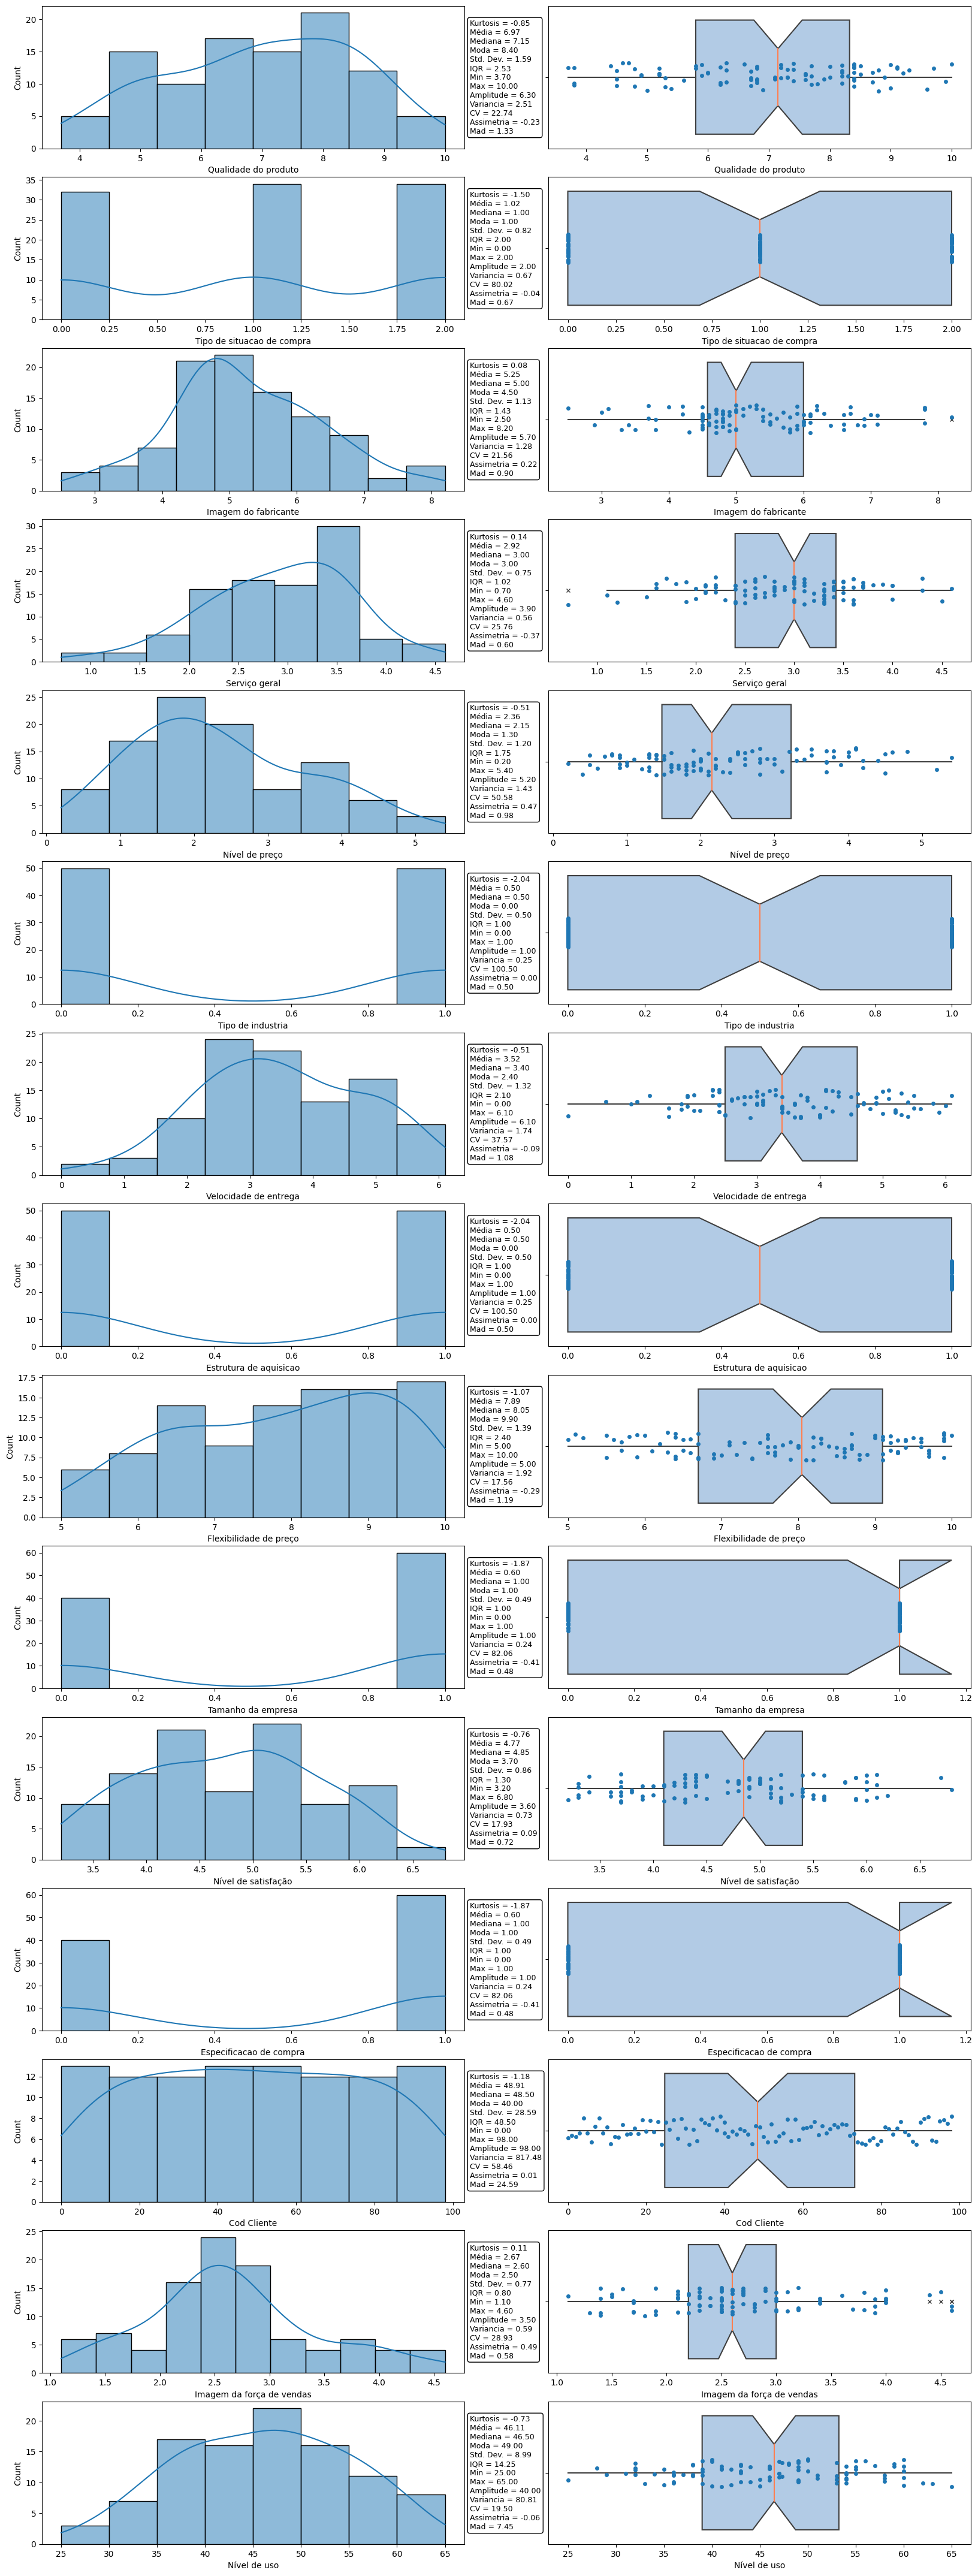

In [102]:
tamanho_figsize = len(continous_features)
fig, axes = plt.subplots(nrows=len(continous_features),ncols=2,  figsize=(20, 55))

for i in range(len(continous_features)):
    feature = continous_features[i]
    data=df.copy()
    
    kurt = data[feature].kurtosis()
    mean = data[feature].mean()
    median = data[feature].median()
    mode = data[feature].mode()[0]
    std_dev = data[feature].std()
    iqr = data[feature].quantile(0.75) - data[feature].quantile(0.25)
    min_val = data[feature].min()
    max_val = data[feature].max()
    amplitude = data[feature].max() - data[feature].min()
    variance = data[feature].var()
    cv = data[feature].std() / data[feature].mean() * 100
    skewness = data[feature].skew()
    mad = np.abs(data[feature] - data[feature].mean()).mean()
    
    
    # plot histogram
    sns.histplot(x=data[feature], ax=axes[i][0], kde=True)
    
    # get position of histogram
    hist_pos = axes[i][0].get_position()
    
    # plot boxplot and scatterplot
    sns.boxplot(x=data[feature], ax=axes[i][1], notch=True, showcaps=False, flierprops={"marker": "x"}, boxprops={"facecolor": (.4, .6, .8, .5)}, medianprops={"color": "coral"})
    sns.stripplot(x=data[feature], ax=axes[i][1])
    
    # add text box with measures
    bbox_props = dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
    textstr = f'Kurtosis = {kurt:.2f}\nMédia = {mean:.2f}\nMediana = {median:.2f}\nModa = {mode:.2f}\nStd. Dev. = {std_dev:.2f}\nIQR = {iqr:.2f}\nMin = {min_val:.2f}\nMax = {max_val:.2f}\nAmplitude = {amplitude:.2f}\nVariancia = {variance:.2f}\nCV = {cv:.2f}\nAssimetria = {skewness:.2f}\nMad = {mad:.2f}'
    t = axes[i][1].text(hist_pos.x0 + 0.357, hist_pos.y0 + 0.0045, textstr, transform=fig.transFigure, bbox=bbox_props, fontsize=9)
